In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = ""
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Pre-processing

In [2]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

student_raw = pd.read_csv('./data/aggregatelogdata.csv')
student_raw = student_raw.set_index('id_student')
student_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19263 entries, 6516 to 2698588
Data columns (total 20 columns):
resource          19263 non-null int64
oucontent         19263 non-null int64
url               19263 non-null int64
glossary          19263 non-null int64
sharedsubpage     19263 non-null int64
dualpane          19263 non-null int64
ouelluminate      19263 non-null int64
ouwiki            19263 non-null int64
homepage          19263 non-null int64
forumng           19263 non-null int64
questionnaire     19263 non-null int64
repeatactivity    19263 non-null int64
subpage           19263 non-null int64
oucollaborate     19263 non-null int64
coursepage        19263 non-null int64
folder            19263 non-null int64
dataplus          19263 non-null int64
externalquiz      19263 non-null int64
htmlactivity      19263 non-null int64
quiz              19263 non-null int64
dtypes: int64(20)
memory usage: 3.1 MB


In [3]:
student_raw.describe()

,resource,oucontent,url,glossary,sharedsubpage,dualpane,ouelluminate,ouwiki,homepage,forumng,questionnaire,repeatactivity,subpage,oucollaborate,coursepage,folder,dataplus,externalquiz,htmlactivity,quiz
count,19263.000000,19263.000000,19263.000000,19263.000000,19263.000000,19263.000000,19263.000000,19263.000000,19263.000000,19263.000000,19263.000000,19263.000000,19263.000000,19263.000000,19263.000000,19263.000000,19263.000000,19263.000000,19263.000000,19263.000000
mean,35.950527,90.794892,18.775892,0.782692,0.007216,0.498624,1.007424,8.324975,79.471733,114.763225,2.201007,0.000311,88.717957,2.927166,2.229923,0.230961,0.684265,2.113586,0.308207,43.836630
std,38.774735,106.716316,24.054417,3.599198,0.098793,1.447085,4.580932,16.061137,62.007493,165.350849,5.907464,0.026958,101.679424,7.324143,4.550565,0.807293,2.181035,7.124891,1.183092,58.183834
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,12.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,19.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,24.000000,50.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,59.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000
75%,46.000000,135.000000,26.000000,1.000000,0.000000,0.000000,0.000000,10.000000,111.000000,144.000000,0.000000,0.000000,131.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,55.000000
max,562.000000,883.000000,409.000000,125.000000,4.000000,18.000000,94.000000,185.000000,747.000000,2862.000000,57.000000,3.000000,1575.000000,123.000000,103.000000,10.000000,32.000000,200.000000,21.000000,993.000000


In [4]:
student_raw.std().sort_values(ascending=False)

forumng           165.350849
oucontent         106.716316
subpage           101.679424
homepage           62.007493
quiz               58.183834
resource           38.774735
url                24.054417
ouwiki             16.061137
oucollaborate       7.324143
externalquiz        7.124891
questionnaire       5.907464
ouelluminate        4.580932
coursepage          4.550565
glossary            3.599198
dataplus            2.181035
dualpane            1.447085
htmlactivity        1.183092
folder              0.807293
sharedsubpage       0.098793
repeatactivity      0.026958
dtype: float64

## Feature scaling
    1. Remove outliers + normalization(min_max scaling)
    2. Standardization: less senstive to outliers
    3. Remove outliers + norm: 将每个sample设置成L2为1，这样对于每个用户来说每个维度有不同比重，不受用户总点击量影响

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

student_raw['motivational']=student_raw['homepage'] + student_raw['quiz']

def remove_outliers_std(df, ratio=10):
    df_copy = df.copy(deep=True)
    for column in df.columns:
        # print('Column: ', column, ' drop ', df[(df[column] - df[column].mean()) > ratio*df[column].std()][column].count())
        df_copy = df_copy[(df_copy[column] - df_copy[column].mean()) < ratio*df_copy[column].std()]
    print('New length: ', len(df_copy.index))
    return df_copy

# studentAgregData = remove_outliers_std(studentAgregData, 10)
# we want to have more data
#scaler = StandardScaler()
#df_copy = scaler.fit_transform(df.drop(columns=['id_student']))

def array2df(array, df):
    df_copy = pd.DataFrame(data=array,
                         index = df.index,
                         columns = df.columns)
    return df_copy

# normalize: Scale input vectors individually to unit norm (vector length).
# 将每个样本设置成等长度，即使有的用户操作相对少也没关系
student_scaled = remove_outliers_std(student_raw)
student_scaled = array2df(normalize(student_scaled, norm='max'), student_scaled)

New length:  18995


In [6]:
student_scaled.mean().sort_values(ascending=False)

motivational      0.775103
forumng           0.549968
oucontent         0.527468
subpage           0.505715
homepage          0.500129
quiz              0.274973
resource          0.249905
url               0.109030
ouwiki            0.043477
oucollaborate     0.015766
coursepage        0.012701
externalquiz      0.011852
questionnaire     0.009058
glossary          0.005078
ouelluminate      0.004908
htmlactivity      0.002307
dualpane          0.002282
dataplus          0.002275
folder            0.001118
repeatactivity    0.000000
sharedsubpage     0.000000
dtype: float64

## Create cleaned dataset

In [21]:
student_8f = pd.DataFrame(index = student_scaled.index)
student_8f['motivational']=student_scaled['motivational']
student_8f['communicational']=student_scaled['forumng']
student_8f['visual']=student_scaled['url']
student_8f['verbal']=student_scaled['resource']
student_8f['sensing']=student_scaled['ouwiki']
student_8f['intuitive']=student_scaled['ouwiki']
student_8f['sequential']=student_scaled['subpage']
student_8f['global']=student_scaled['oucontent']
#student_8f['ouwiki']=student_scaled['ouwiki']
#student_8f['quiz']=student_scaled['quiz']
student_8f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18995 entries, 6516 to 2698588
Data columns (total 8 columns):
motivational       18995 non-null float64
communicational    18995 non-null float64
visual             18995 non-null float64
verbal             18995 non-null float64
sensing            18995 non-null float64
intuitive          18995 non-null float64
sequential         18995 non-null float64
global             18995 non-null float64
dtypes: float64(8)
memory usage: 1.9 MB


## Visualization

Saving figure studentDataPre1


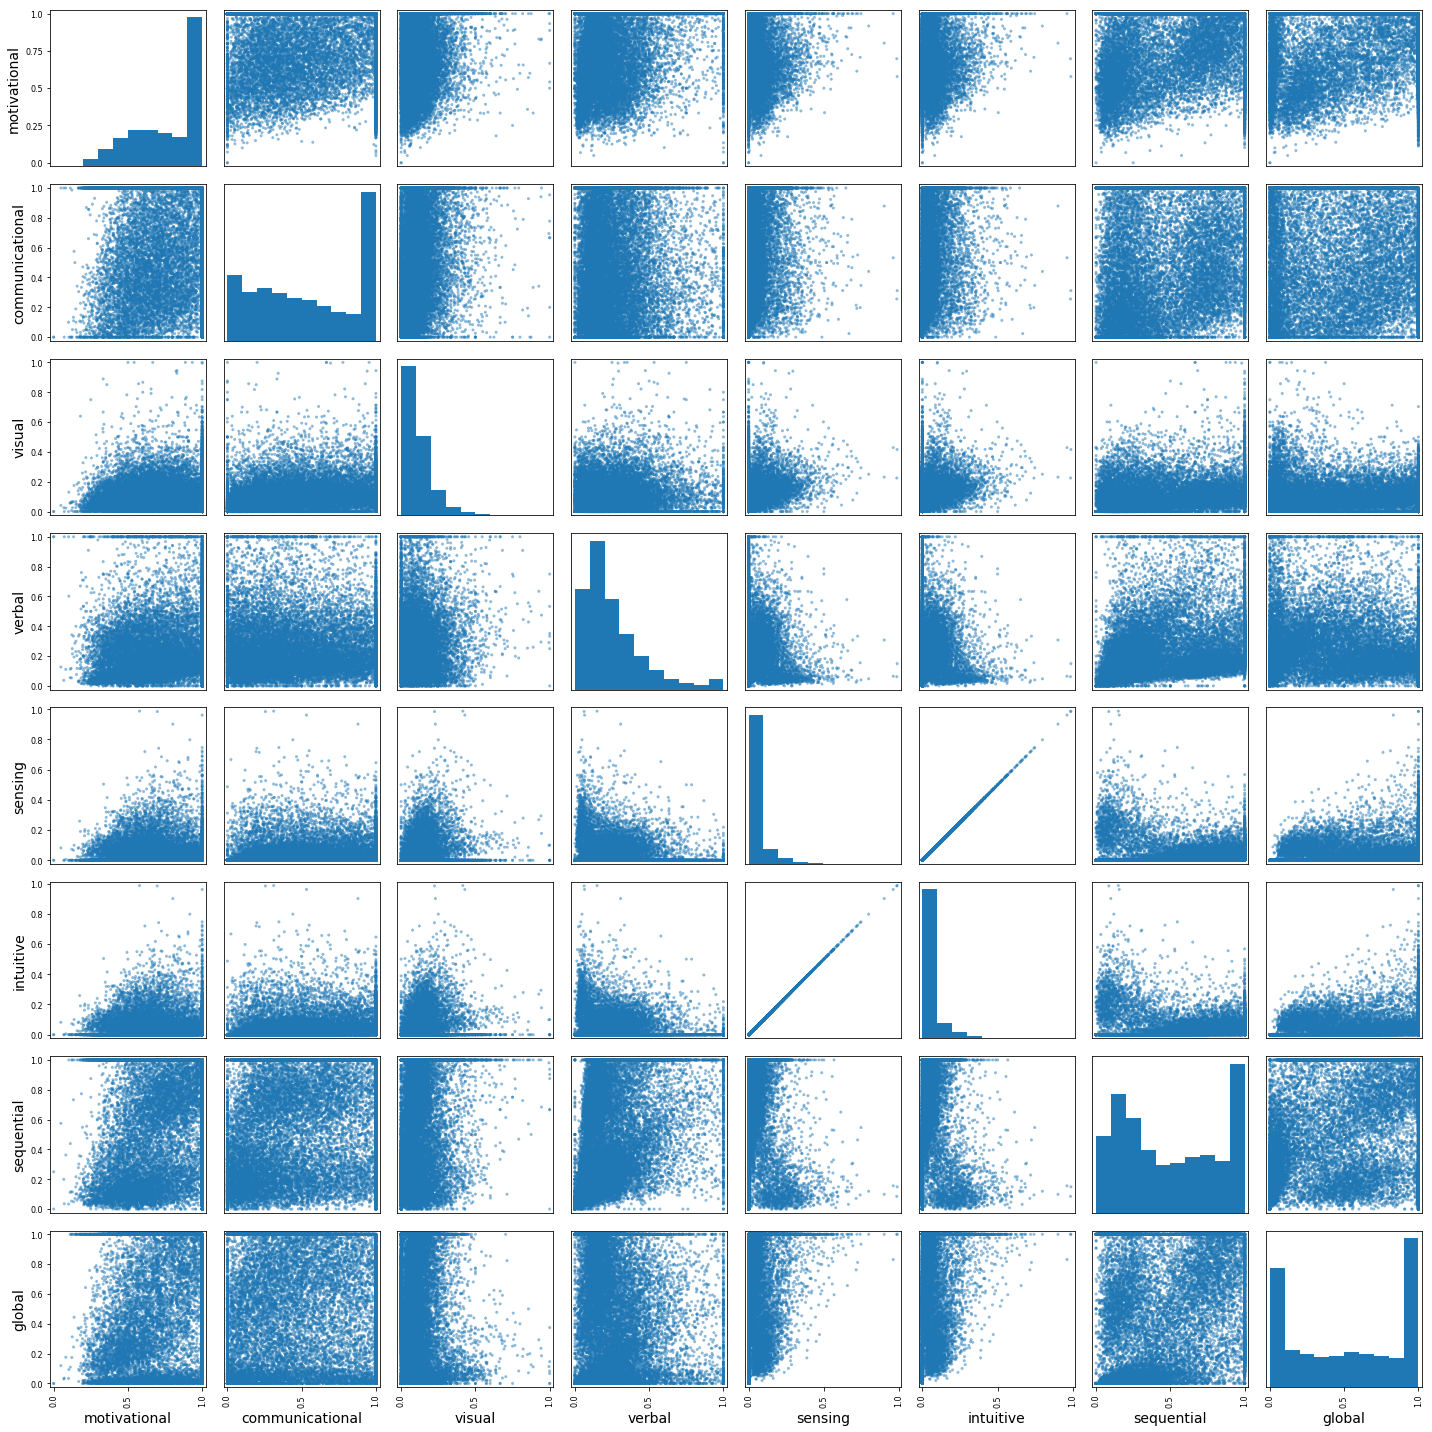

In [81]:
from pandas.plotting import scatter_matrix

scatter_matrix(student_8f, figsize=(20, 20))
save_fig("studentDataPre1")

### PCA

In [13]:
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import KernelPCA

def draw_pic(df, labels=None, filename='none'):
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df.values)
    if labels is None:
        plt.scatter(df_pca[:, 0], df_pca[:, 1], s=0.2)
    else:
        plt.scatter(df_pca[:, 0], df_pca[:, 1], s=0.2, c=1.0*labels)
    plt.savefig('./images/' + filename + '.png')

#draw_pic(student_8f)

## [Hopkins Statistic](https://datascience.stackexchange.com/questions/14142/cluster-tendency-using-hopkins-statistic-implementation-in-python)
估计聚类趋势，评定数据集是否具有可以导致有意义的聚类的非随机结构 P316
>If the value is between {0.01, ...,0.3}, the data is regularly spaced.
>If the value is around 0.5, it is random.
>If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [137]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

hopkins(student_scaled)

0.89616110282116923

# Clustering

## User-defined n_clusters
### 聚类算法分析

- K-means
    
    **Max SC: 0.302814026515 , K = 5, Max CH: 6955.99382044 , K = 5**
    
    
- AgglomerativeClustering ([Hierarchical](http://blog.pluskid.org/?p=407), bottom to top)

    **linkage=ward, Max SC: 0.258765200957 , K = 5, Max CH: 5660.03870087 , K = 5**
    
    **linkage=average, Max SC: 0.275686716508 , K = 3, Max CH: 2402.6849115 , K = 9**
    
    hierarchical clustering 算法似乎都是描述起来很简单，计算起来很困难（计算量很大）。并且，不管是 agglomerative 还是 divisive 实际上都是贪心算法了，也并不能保证能得到全局最优的。而得到的结果，虽然说可以从直观上来得到一个比较形象的大局观，但是似乎实际用处并不如众多 flat clustering 算法那么广泛。
    

In [23]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

def clustering(df, k=5):
    cluster_algo = KMeans(n_clusters=k, init='k-means++')
    #cluster_algo = AgglomerativeClustering(n_clusters=k, linkage='average')
    cluster_algo.fit(df)
    return cluster_algo.labels_

### Birch

In [106]:
from sklearn.cluster import Birch

brc = Birch(branching_factor=500, n_clusters=None, threshold=0.1, compute_labels=True)
brc.partial_fit(student_8f)

def clustering_brich(df, k=0.6):
    brc.set_params(threshold=k)
    brc.fit(df)
    return brc.labels_

#print(max(brc.labels_))

### AffinityPropagation -- too slow!!

In [9]:
from sklearn.cluster import AffinityPropagation

af = AffinityPropagation()
af.fit_predict(student_8f)
student_labels = af.labels_
prtin(max(student_labels))


KeyboardInterrupt



### DBSCAN

In [144]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=7.2, min_samples=190)

def clustering_dbscan(df, k=100):
    db.set_params(eps=k)
    return db.fit_predict(df)

### Meanshift -- too slow!!! 分为1类

In [13]:
from sklearn.cluster import MeanShift

ms = MeanShift()
ms.fit_predict(student_8f)
student_labels = ms.labels_
print(max(student_labels))

0


## Evaluation

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score

def drawEvaluationGraph(params, sc_scores, ch_scores, paramname):
    fig = plt.figure(figsize=(8,6))
    ax_sc = fig.add_subplot(111)
    ax_sc.plot(params, sc_scores, 'r', label="Silhouette Coefficient")
    ax_sc.legend(loc=1)
    ax_sc.set_ylabel('SC Scores')
    ax_ch = ax_sc.twinx()
    ax_ch.plot(params, ch_scores, 'g', label="Calinski-Harabaz Index")
    ax_ch.legend(loc=2)
    ax_ch.set_ylabel('CH Scores')
    ax_ch.set_xlabel(paramname);
    plt.title('SC & CH scores')
    plt.grid(params)
    plt.show()
    print('Max SC:', max(sc_scores), ', K =',sc_scores.index(max(sc_scores))+3)
    print('Max CH:', max(ch_scores), ', K =',ch_scores.index(max(ch_scores))+3)

labels_list = []
sc_score_list = []
ch_score_list = []
param_list = range(70, 80, 2)
for i in param_list:
    print('Clustering...', i)
    labels = clustering_dbscan(student_8f, float(i/10))
    labels_list.append(labels)
    sc_score_list.append(silhouette_score(student_8f, labels, metric='euclidean'))
    ch_score_list.append(calinski_harabaz_score(student_8f, labels))
drawEvaluationGraph(param_list, sc_score_list, ch_score_list, 'n_cluster')

## Visualization

5


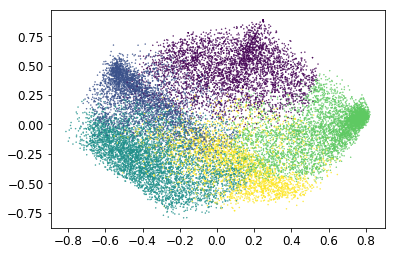

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score
#print('SC:', silhouette_score(student_8f, student_labels, metric='euclidean'))
#print('CH:', calinski_harabaz_score(student_8f, student_labels))
print(max(student_labels)+1)
draw_pic(student_8f.drop(columns=['cluster']), student_labels, 'Kmeans5')

### Generate final clusters

In [22]:
from sklearn.cluster import KMeans

cluster_algo = KMeans(n_clusters=5, init='k-means++')
cluster_algo.fit(student_8f)
student_labels = cluster_algo.labels_
student_8f['cluster'] = student_labels
student_8f = student_8f.sort_values(by=['cluster'])
student_8f.to_csv('./data/clustering_result.csv')